In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from scipy.special import softmax

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (2).csv


In [ ]:
data = pd.read_csv("Dataset.csv")

In [ ]:
data.head()

,VA,VB,VC,IA,IB,IC,ZA,ZB,ZC,Fault Type
0,0.999866,0.999867,0.999712,0.09651,0.103924,0.103933,0.917289,0.881222,0.914548,0
1,0.999866,0.999867,0.999712,0.09651,0.103924,0.103933,0.917289,0.881222,0.914548,0
2,0.999866,0.999867,0.999712,0.09651,0.103924,0.103933,0.917289,0.881222,0.914548,0
3,0.999866,0.999867,0.999712,0.09651,0.103924,0.103933,0.917289,0.881222,0.914548,0
4,0.999866,0.999867,0.999712,0.09651,0.103924,0.103933,0.917289,0.881222,0.914548,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VA          9900 non-null   float64
 1   VB          9900 non-null   float64
 2   VC          9900 non-null   float64
 3   IA          9900 non-null   float64
 4   IB          9900 non-null   float64
 5   IC          9900 non-null   float64
 6   ZA          9900 non-null   float64
 7   ZB          9900 non-null   float64
 8   ZC          9900 non-null   float64
 9   Fault Type  9900 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 773.6 KB


<Axes: >

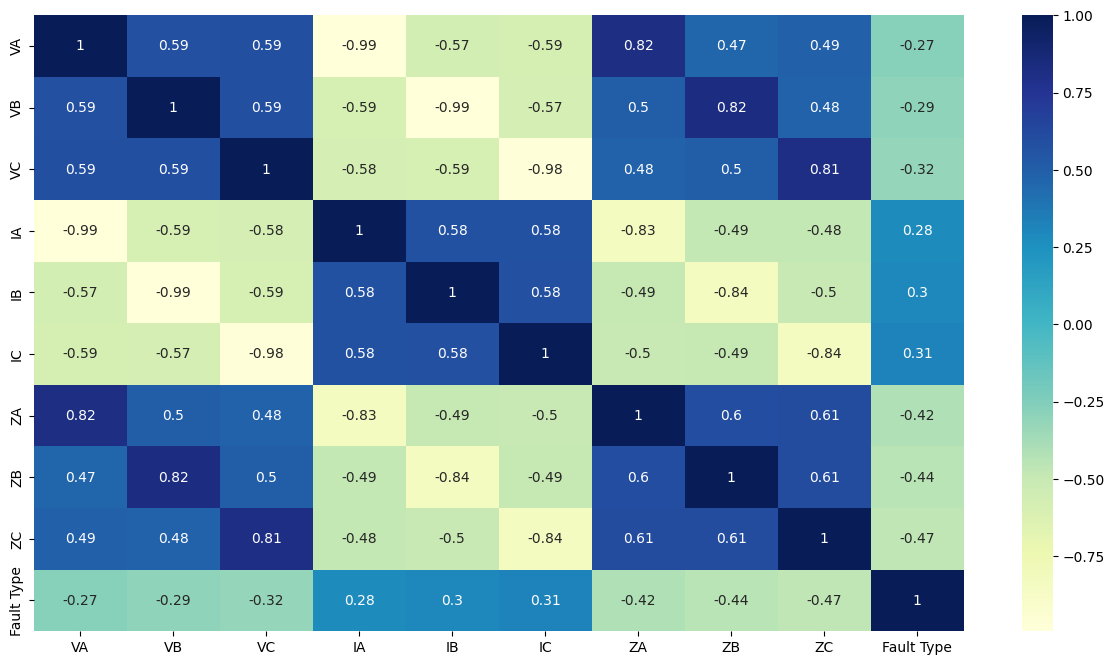

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

array([[<Axes: title={'center': 'VA'}>, <Axes: title={'center': 'VB'}>,
        <Axes: title={'center': 'VC'}>],
       [<Axes: title={'center': 'IA'}>, <Axes: title={'center': 'IB'}>,
        <Axes: title={'center': 'IC'}>],
       [<Axes: title={'center': 'ZA'}>, <Axes: title={'center': 'ZB'}>,
        <Axes: title={'center': 'ZC'}>],
       [<Axes: title={'center': 'Fault Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

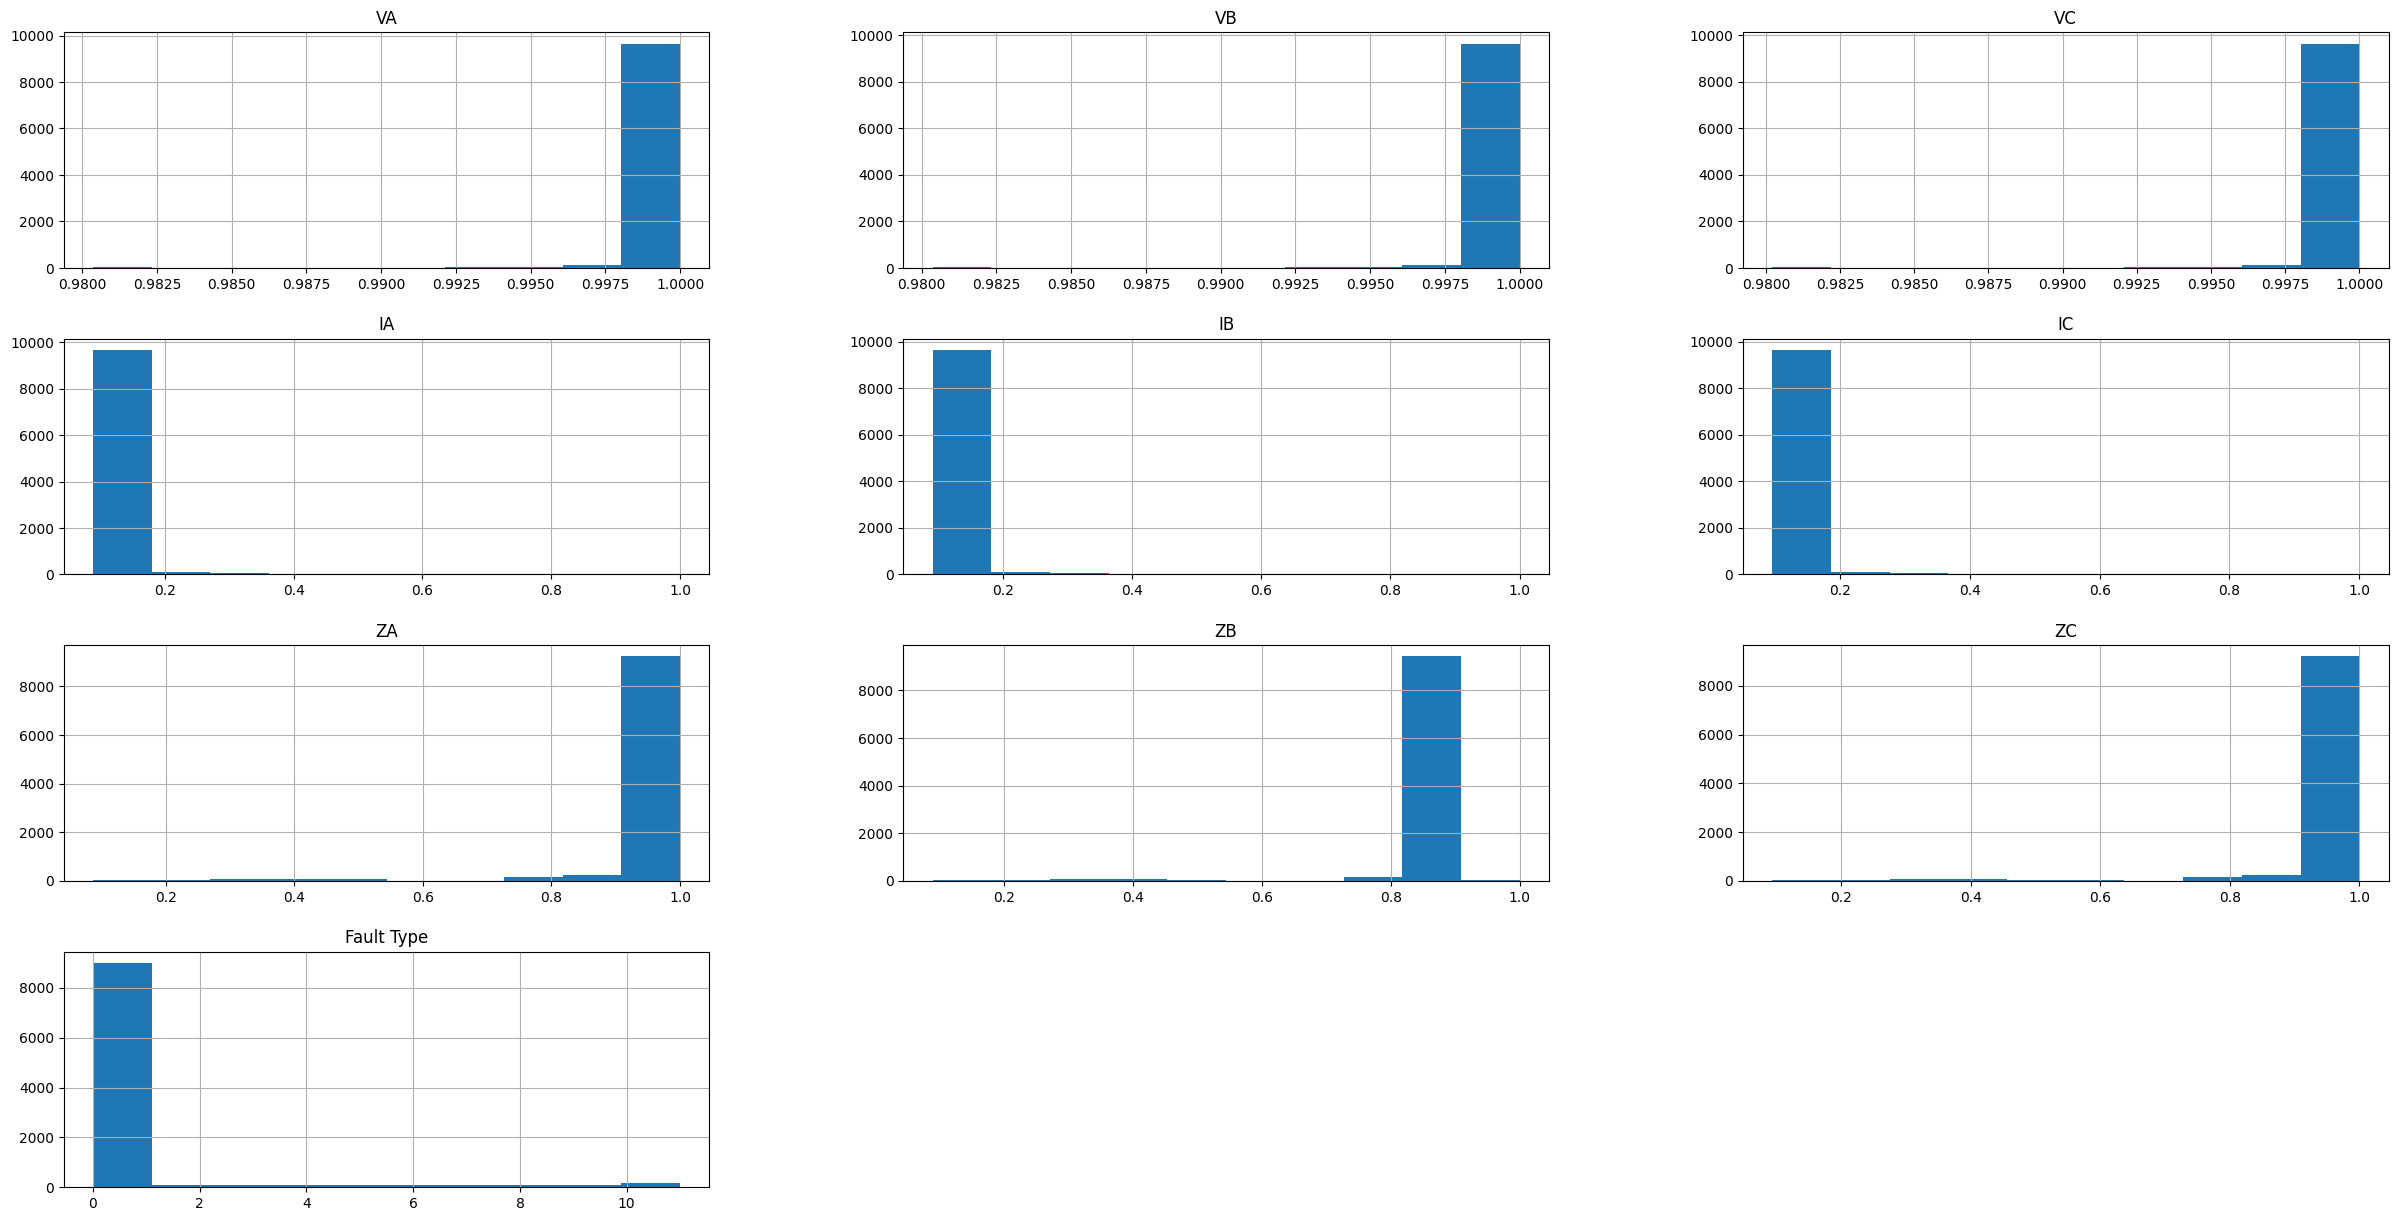

In [ ]:
data.hist(figsize = (30,15))

In [ ]:
# Get the unique values in the Fault Type column
unique_values = data['Fault Type'].unique()

# Print the unique values
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
X = data.drop(['Fault Type'], axis=1)
y = data['Fault Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9919191919191919
Precision: 0.9310804595731067
Recall: 0.9508175175095906
F1-score: 0.9361922682281457


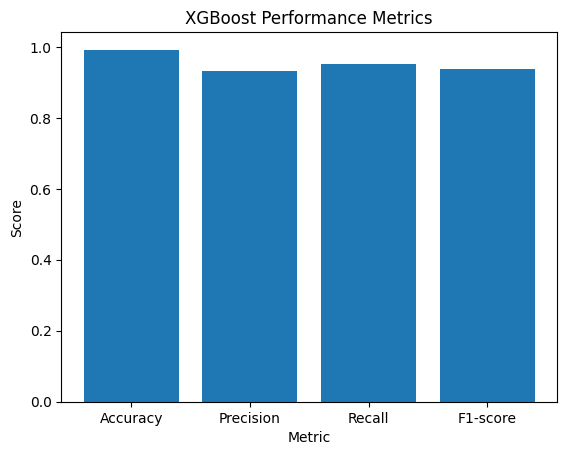

In [ ]:
# Visualize the metrics
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-score'], [accuracy, precision, recall, f1])
plt.title('XGBoost Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

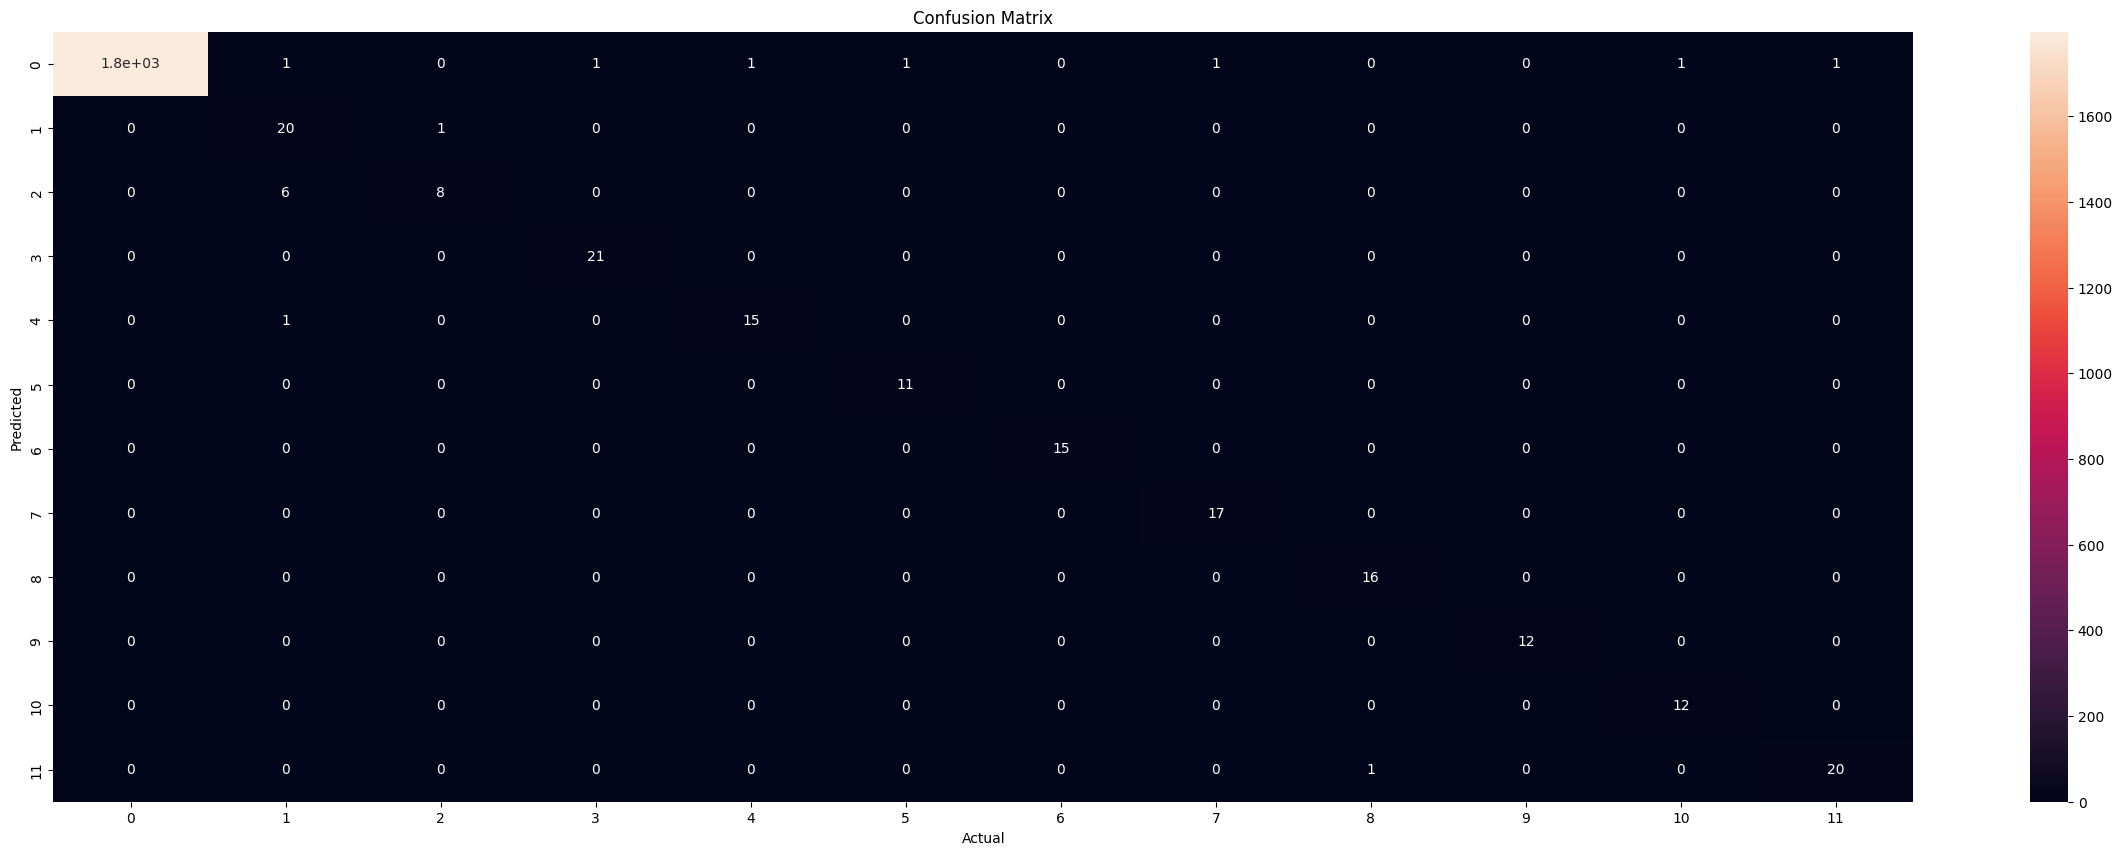

In [ ]:
plt.figure(figsize=(30,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
num_11s = np.sum(y_test == 0)
print(num_11s)

1804


In [ ]:
len(X_train)

7920

In [ ]:
len(X_test)

1980

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
512

512

In [ ]:
shap.initjs()

#explaining the importance of the features
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
np.shape(shap_values)

(12, 1980, 9)

In [ ]:
shap_values

[array([[ 0.15732363, -0.13255368,  0.48391804, ...,  0.03997202,
          1.665976  ,  0.13711676],
        [ 0.16198334, -0.13406752,  0.47179845, ...,  0.04079841,
          1.6500175 ,  0.13711676],
        [ 0.15732363, -0.13255368,  0.48391804, ...,  0.03997202,
          1.665976  ,  0.13711676],
        ...,
        [ 0.15732363, -0.13255368,  0.48391804, ...,  0.03997202,
          1.665976  ,  0.13711676],
        [ 0.15732363, -0.13255368,  0.48391804, ...,  0.03997202,
          1.665976  ,  0.13711676],
        [ 0.1565637 , -0.13097239,  0.48358846, ...,  0.03997202,
          1.665976  ,  0.13711676]], dtype=float32),
 array([[-5.5591190e-01, -2.5669309e-01, -8.3986831e-01, ...,
          6.0070195e-04, -3.7071618e-01, -7.1541034e-03],
        [-5.5591190e-01, -2.5669309e-01, -8.3986831e-01, ...,
          6.0070195e-04, -3.7071618e-01, -7.1541034e-03],
        [-5.5591190e-01, -2.5669309e-01, -8.3986831e-01, ...,
          6.0070195e-04, -3.7071618e-01, -7.1541034e-03]

<Axes: >

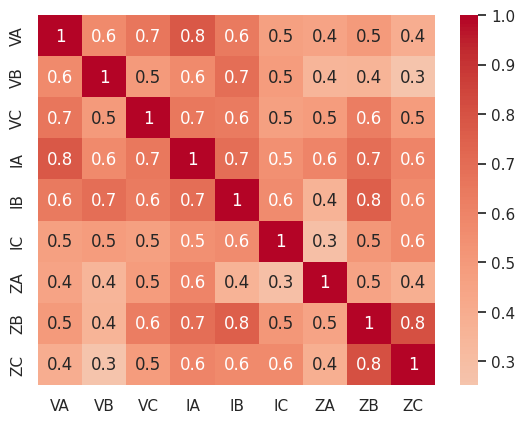

In [ ]:
# SHAP correlation plot
corr_matrix = pd.DataFrame(shap_values[0],
                           columns=X.columns).corr()

sns.set(font_scale=1)
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center = 0,
            annot=True,
            fmt='.1g')

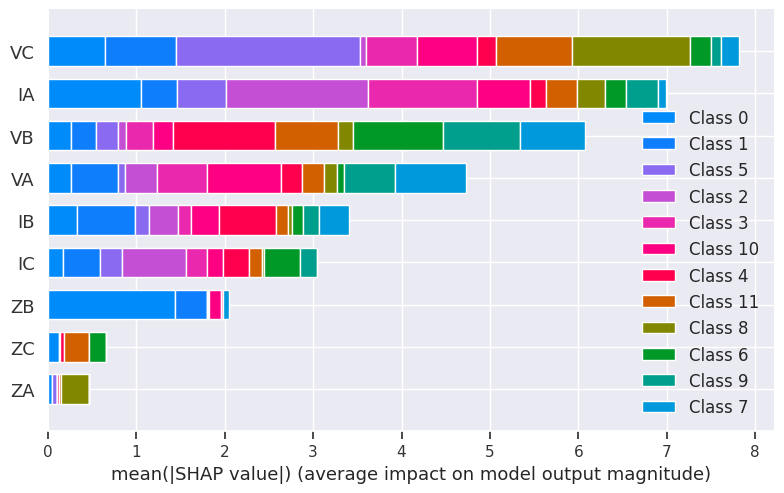

In [ ]:
shap.summary_plot(shap_values, X_test)
#shap.summary_plot(shap_values, X_test.values, plot_type="bar", feature_names = X.columns)

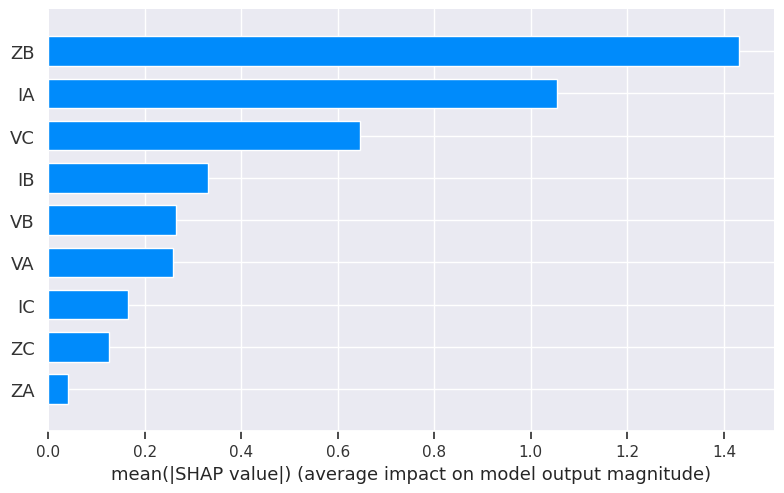

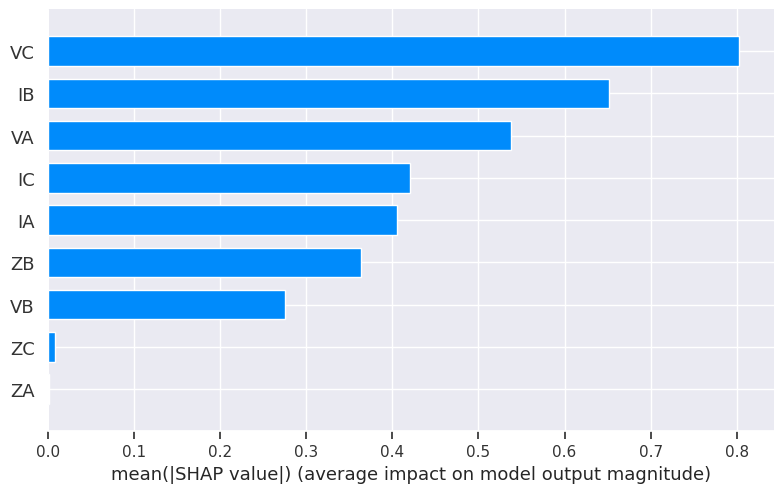

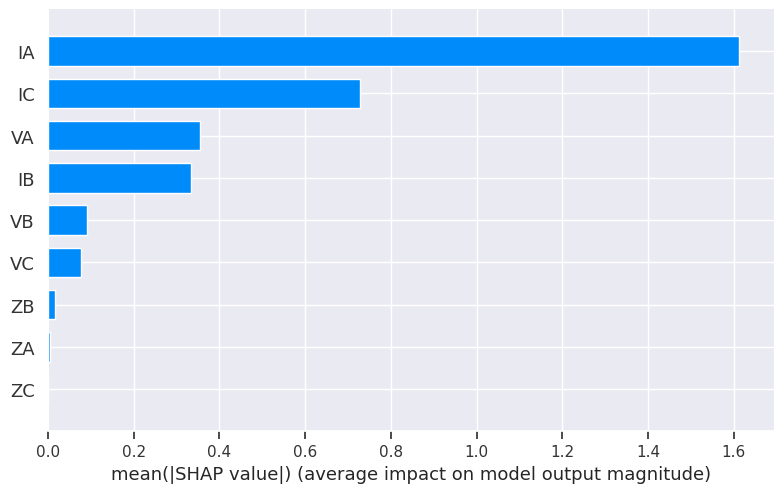

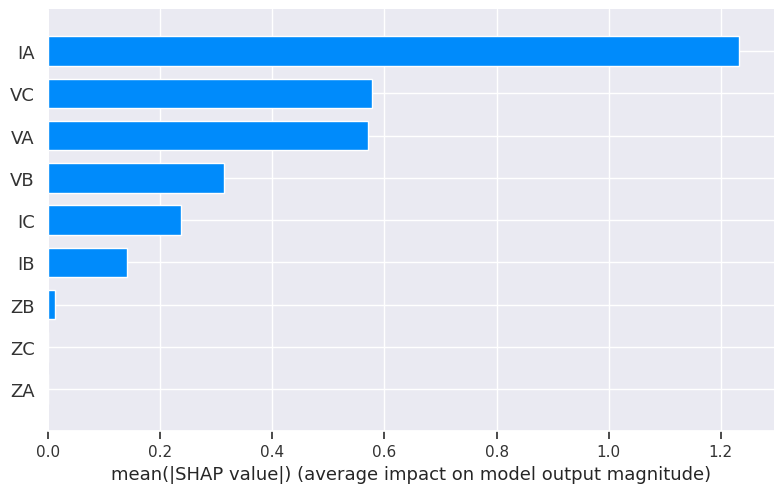

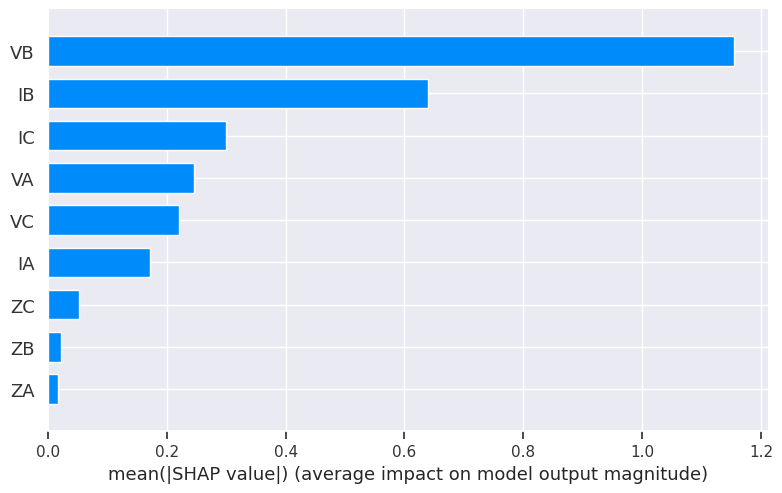

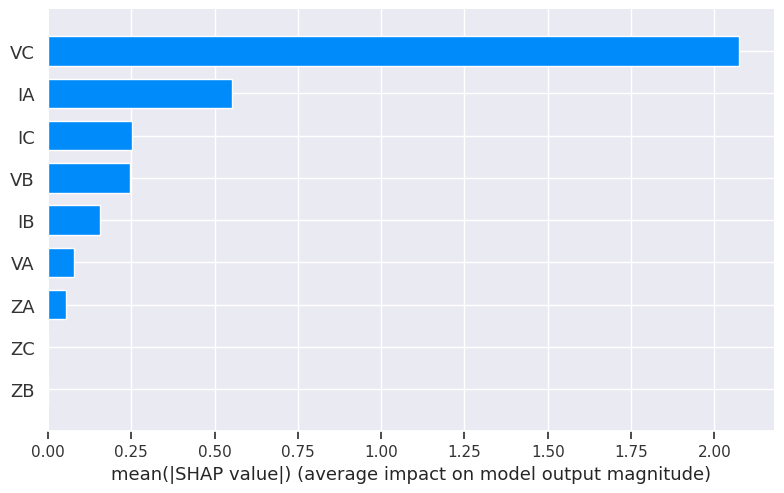

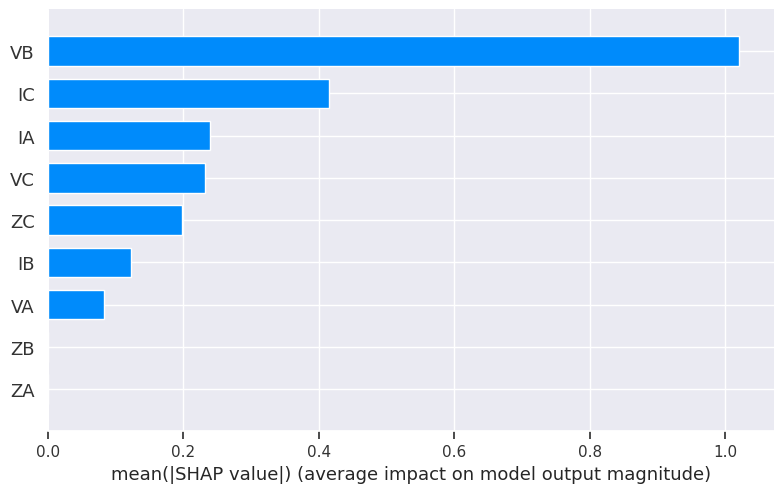

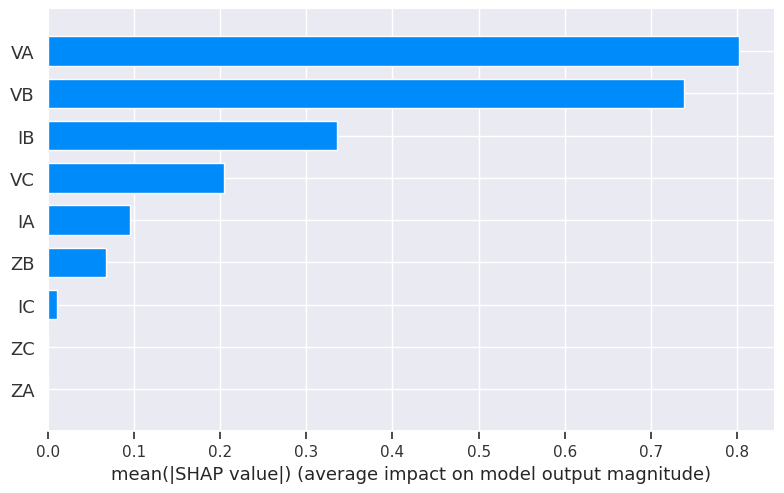

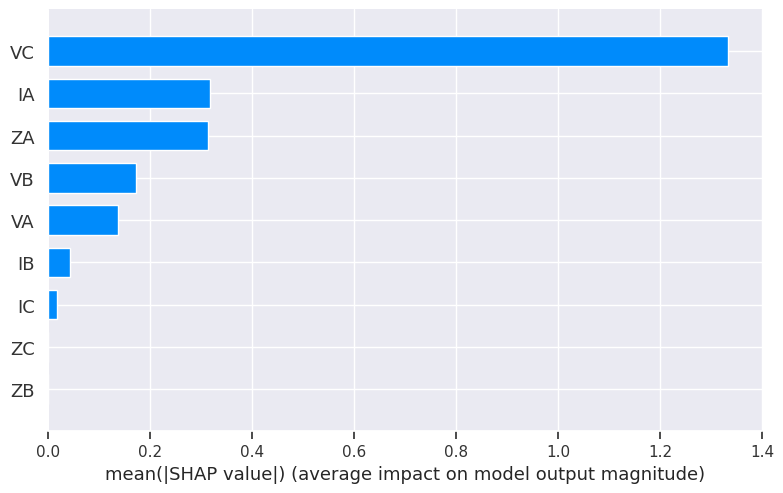

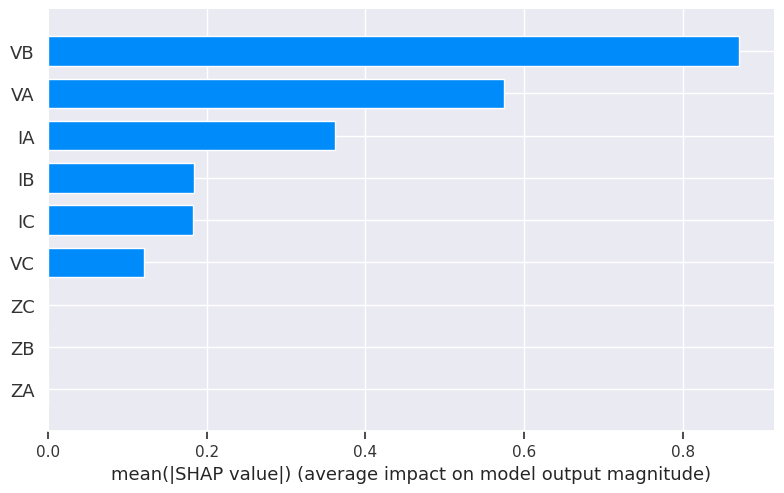

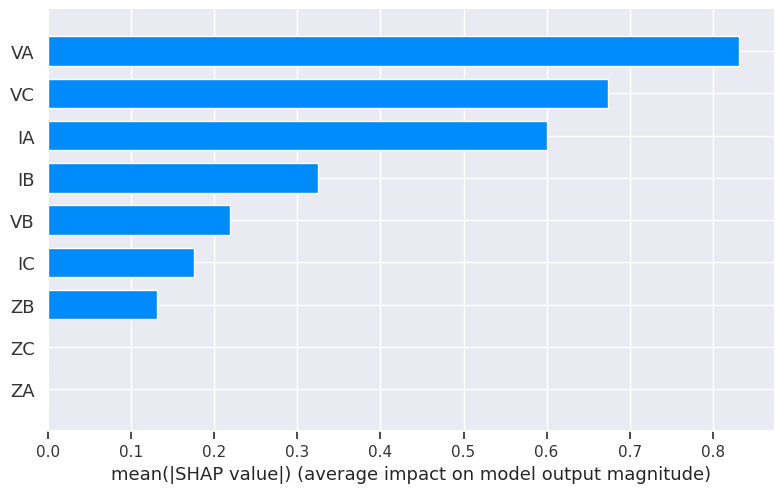

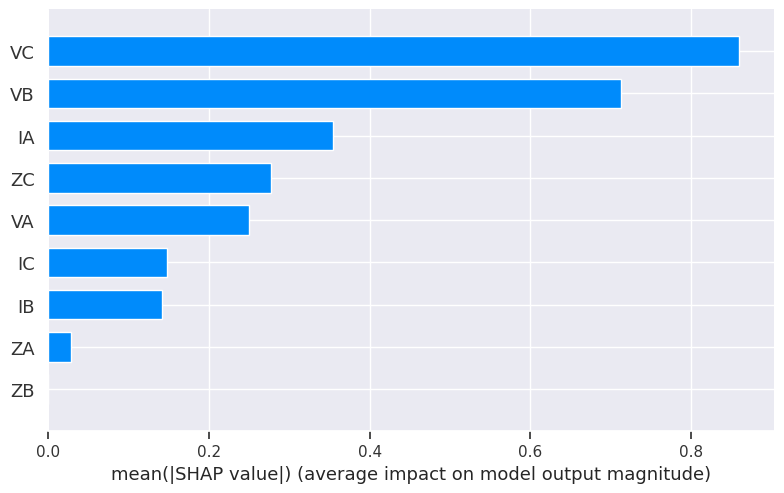

In [ ]:
# Make a loop to visualize all classes
for i in range(0, 12):
    shap.summary_plot(shap_values[i], X, plot_type='bar', class_names=data['Fault Type'].unique())

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. You can see that the feature ZA in the first class, being the least important feature, has low Shapley values. The color represents the value of the feature from low to high. Overlapping points are jittered in the y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


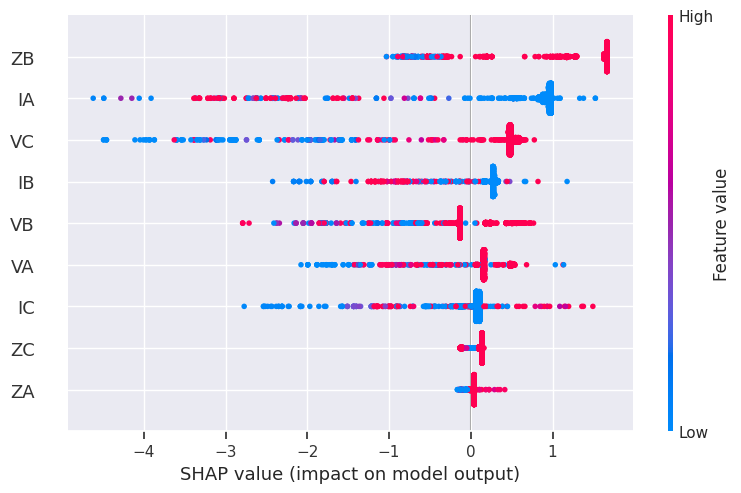

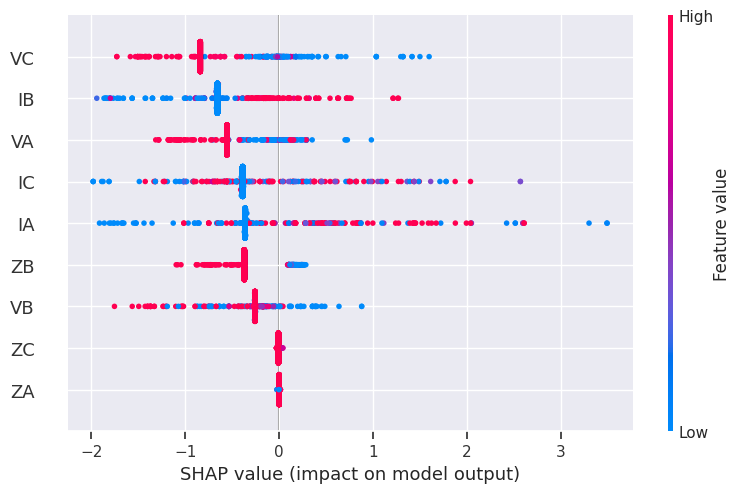

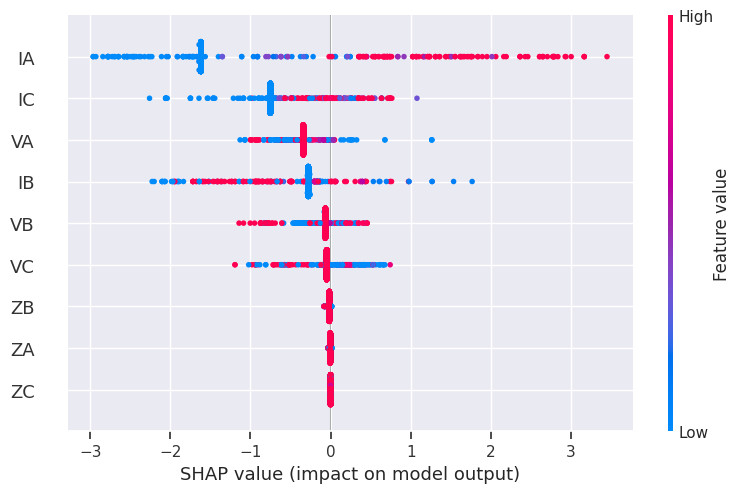

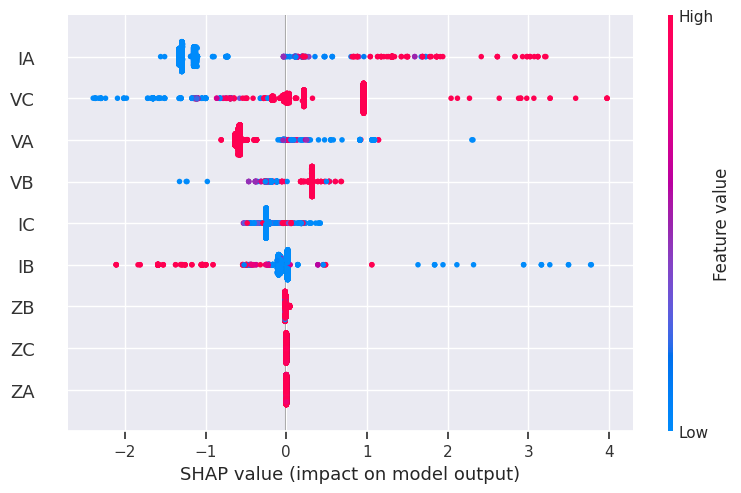

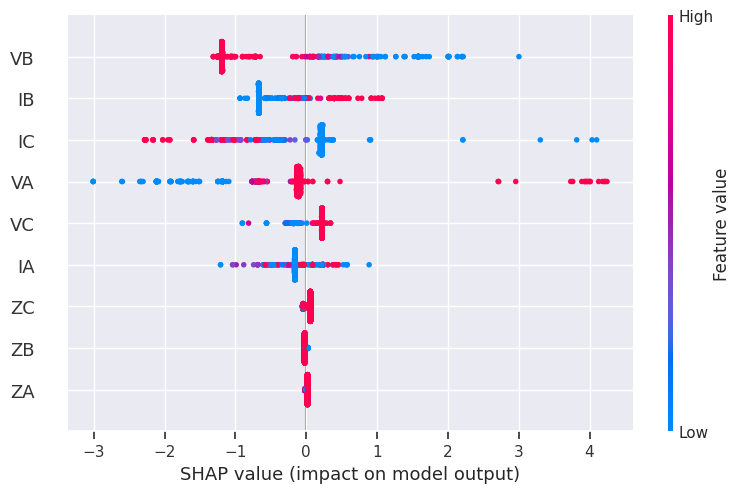

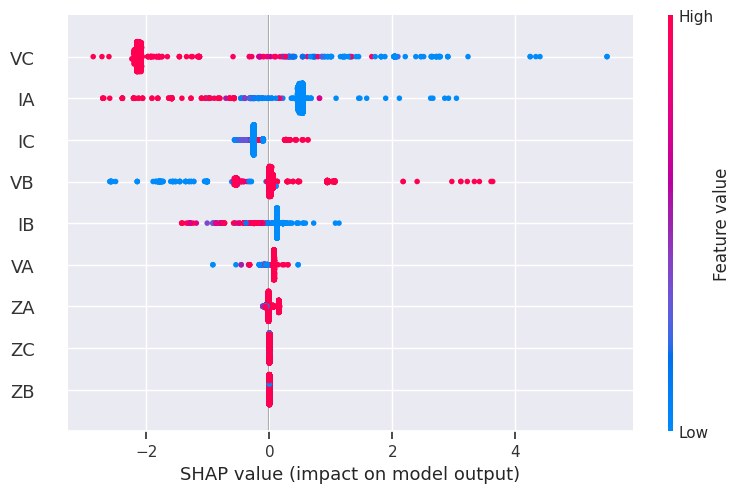

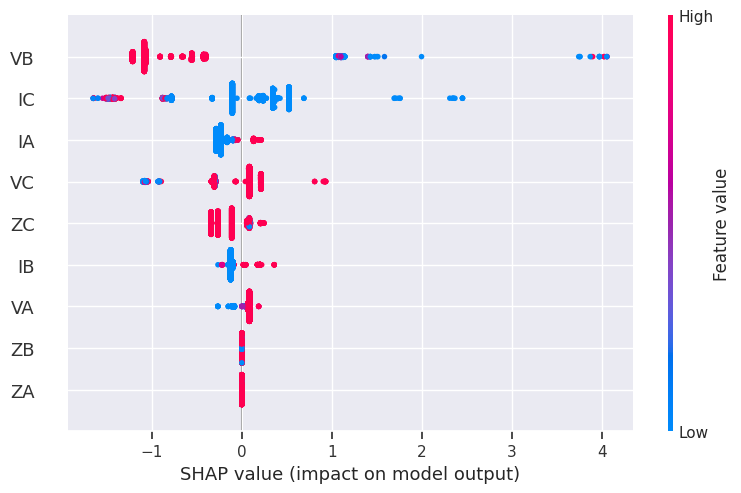

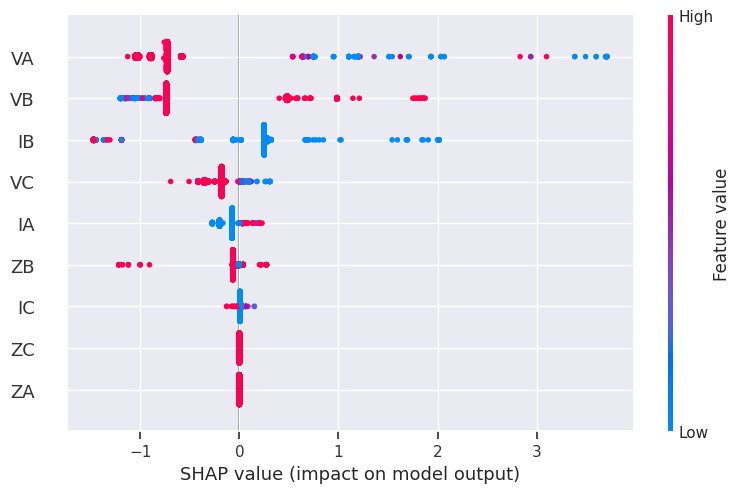

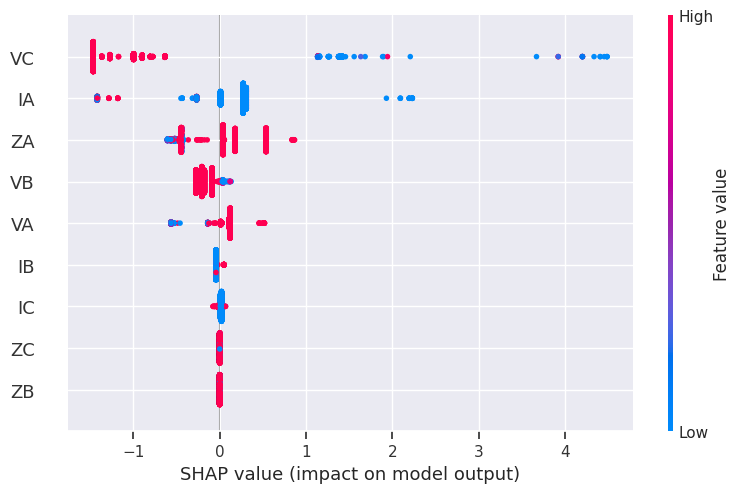

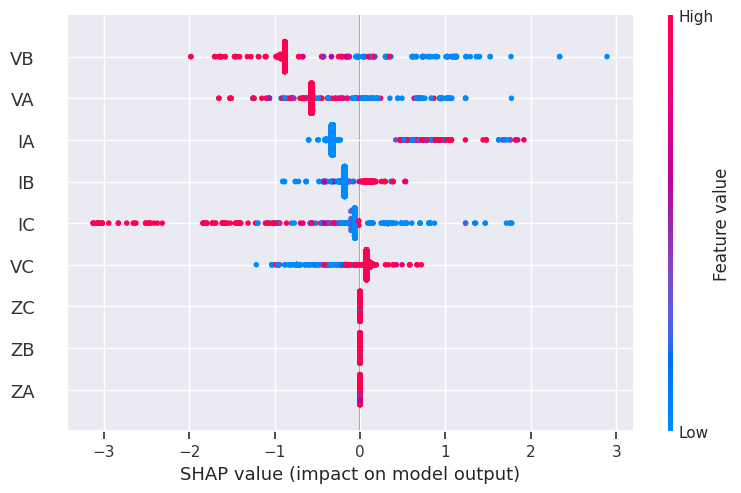

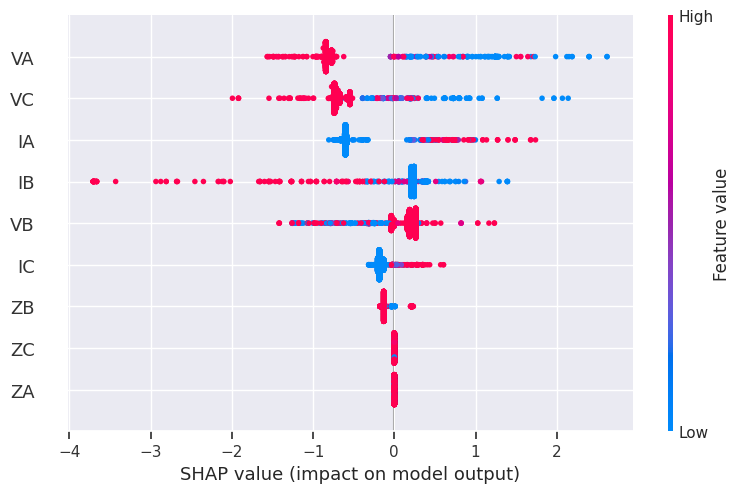

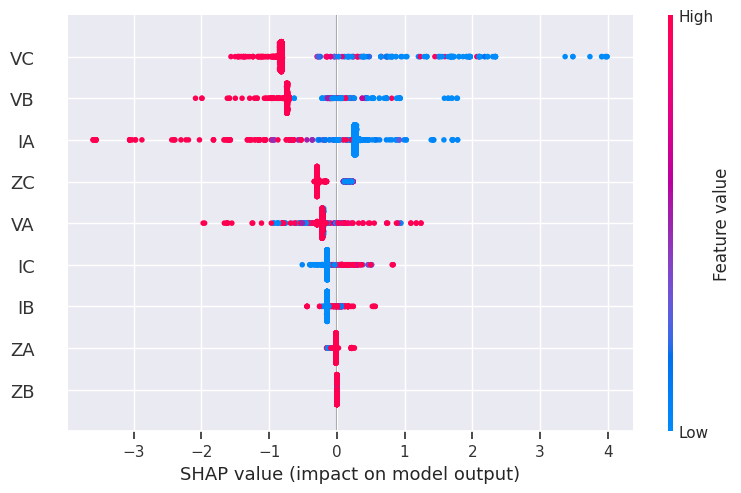

In [ ]:
# Shap values for each prediction
shap_values = explainer.shap_values(X_test)
shap_list = [shap_values[i] for i in range(len(shap_values))]

for i, shap_val in enumerate(shap_list):
    #print("Shap value of prediction {} is {}".format(i, shap_val))
    # Visualize the explanations
    shap.summary_plot(shap_val, X_test)

In the summary plot, we see the first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic, or more complex.

The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome. The PDP assumes that the first feature is not correlated with the second feature. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible.

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. In this example, the contribution of VA increases significantly when the feature value of VA is 1.000 and begins to depend a lot from the feature value of ZB.

Each dot is a single prediction (row) from the dataset.
The x-axis is the actual value from the dataset.
The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically). If an interaction effect is present between this other feature and the feature we are plotting it will show up as a distinct vertical pattern of coloring.

invalid value encountered in true_divide
invalid value encountered in true_divide


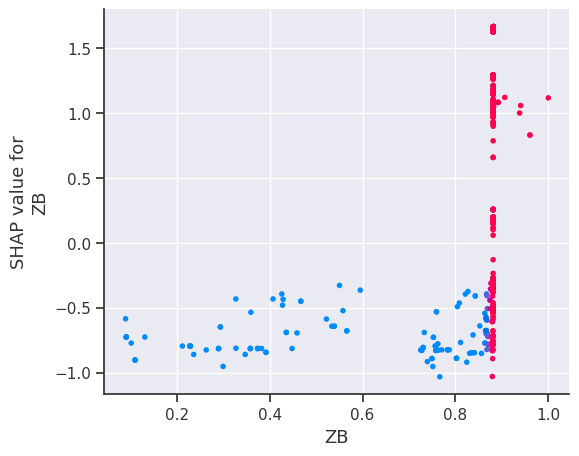

In [ ]:
# Visualize the explanations
#shap.dependence_plot("VA", shap_values[0], X_test, interaction_index=None)
shap.dependence_plot(7, shap_values[0], X_test.values, feature_names=X_test.columns)

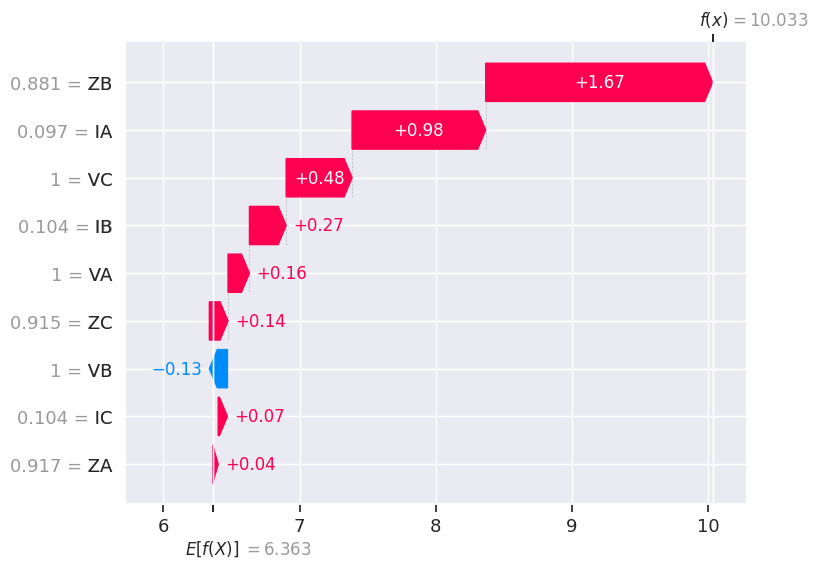

In [ ]:
row = 0
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],
                                         feature_names=X_test.columns.tolist()))

In [ ]:
from shap import KernelExplainer
masker = shap.maskers.Independent(X_test, 100)
ke = KernelExplainer(xgb_model.predict_proba, data=masker.data)
ke.expected_value
shap_values=ke.shap_values(masker.data)

AttributeError: ignored

In [ ]:
from shap import Explanation
shap.waterfall_plot(Explanation(shap_values[0][0],ke.expected_value[0], data=X_test.iloc[0],
                                         feature_names=X_test.columns.tolist()))

NameError: ignored

In [ ]:
#define a function to convert logodds to probability for multi-class
def logodds_to_proba(logodds):
    return np.exp(logodds)/np.exp(logodds).sum()

#generate predictions for our row of data and do conversion
logodds = mcl.predict(X_rand, output_margin=True)
probas = mcl.predict_proba(X_rand)
for which_class in range(0,3):
    base_val = explainer.expected_value[which_class]
    pred_val = explainer.expected_value[which_class] + shap_values[which_class][0].sum() #delta between base value and pred value
    converted_prob_val = logodds_to_proba(logodds)[0][which_class]
    proba = probas[0][which_class]

    print('Class: ',which_class)
    print('Base value: ', base_val)
    print('Prediction value: ', pred_val)
    print('Converted Proba value:', converted_prob_val)
    print('Proba value:', proba, '\n')

In [ ]:
#define a function to convert logodds to probability for multi-class
def logodds_to_proba(logodds):
    return np.exp(logodds)/np.exp(logodds).sum()



In [ ]:
# Calculate shap values for each class
shap_by_class = [shap_values[i] for i in range(len(shap_values))]

# Get list of features
features = list(X_test.columns)

# Get target class
target_class = 0

# Get shap values for target class
shap_class_0 = shap_by_class[target_class]

# Create dictionary to count particular order of importance
order_count = {}

# Iterate over shap values
for shap_values in shap_class_0:
  # Get sorted feature indexes descending by importance
  feature_indexes = np.argsort(-shap_values)[:len(features)]
  # Convert feature indexes to list of features
  feature_order = [features[i] for i in feature_indexes]
  # Convert list to string
  feature_order_string = ','.join(feature_order)
  # Increment value in dictionary
  if feature_order_string not in order_count:
    order_count[feature_order_string] = 1
  else:
    order_count[feature_order_string] += 1

# Print order count dictionary
print(order_count)

{'ZB,IA,VC,IB,VA,ZC,IC,ZA,VB': 1467, 'IA,ZA,ZC,IC,VB,VA,IB,ZB,VC': 2, 'ZA,ZC,VC,ZB,IB,VA,IC,VB,IA': 1, 'ZA,ZC,ZB,IB,VA,IC,VC,VB,IA': 4, 'ZB,IA,VC,VA,IB,VB,IC,ZC,ZA': 57, 'VC,ZA,VA,ZC,IB,ZB,VB,IC,IA': 1, 'IA,VB,VC,IB,ZC,VA,IC,ZA,ZB': 4, 'VC,ZA,ZC,IC,VB,ZB,IB,VA,IA': 2, 'IA,VA,ZA,ZC,IC,VB,IB,ZB,VC': 1, 'ZB,IA,VC,IB,VB,VA,ZC,IC,ZA': 42, 'VC,ZA,ZC,IC,VA,ZB,IB,VB,IA': 3, 'IA,VC,VA,VB,IB,ZB,ZA,IC,ZC': 4, 'ZB,IA,VC,VA,IB,VB,ZC,IC,ZA': 16, 'IA,VC,VA,VB,IB,ZB,ZC,IC,ZA': 24, 'IC,ZC,ZA,IB,ZB,VB,VA,IA,VC': 6, 'ZB,VC,ZA,IB,ZC,VB,IC,VA,IA': 1, 'ZB,IA,VC,VA,IB,VB,ZA,ZC,IC': 11, 'ZC,ZA,VA,ZB,IB,IC,VB,VC,IA': 4, 'ZB,IB,ZA,ZC,VB,VA,VC,IC,IA': 2, 'VA,ZC,ZA,IC,VB,IB,ZB,IA,VC': 1, 'ZB,IA,VC,IB,VB,VA,IC,ZC,ZA': 25, 'IC,IB,IA,ZA,ZC,ZB,VA,VB,VC': 1, 'ZC,ZA,VA,ZB,IB,IC,IA,VB,VC': 2, 'VC,ZC,ZA,VA,ZB,IB,IC,VB,IA': 3, 'ZB,IA,VC,VA,IB,VB,IC,ZA,ZC': 10, 'IA,VB,VC,IB,VA,ZA,IC,ZC,ZB': 13, 'ZC,ZA,VA,IB,ZB,VB,IC,VC,IA': 3, 'ZC,ZA,IC,ZB,VB,IB,VA,IA,VC': 11, 'IA,VB,VC,VA,IB,ZA,IC,ZC,ZB': 15, 'IA,ZA,ZC,ZB,IB,VA,IC,VB,VC':

In [ ]:
# Convert order_count dictionary to a dataframe
order_count_df = pd.DataFrame.from_dict(order_count, orient='index', columns=['count'])

# Reset index
order_count_df.reset_index(level=0, inplace=True)

# Add column names
order_count_df.rename(columns={'index': 'feature_order'}, inplace=True)

# Sort dataframe by count
order_count_df.sort_values(by='count', inplace=True, ascending=False)

# Print dataframe
print(order_count_df)

                  feature_order  count
0    ZB,IA,VC,IB,VA,ZC,IC,ZA,VB   1467
4    ZB,IA,VC,VA,IB,VB,IC,ZC,ZA     57
9    ZB,IA,VC,IB,VB,VA,ZC,IC,ZA     42
20   ZB,IA,VC,IB,VB,VA,IC,ZC,ZA     25
13   IA,VC,VA,VB,IB,ZB,ZC,IC,ZA     24
..                          ...    ...
88   VA,ZA,IC,ZC,IA,IB,ZB,VB,VC      1
85   IA,VB,ZA,ZC,IB,VA,IC,ZB,VC      1
84   ZB,IB,ZC,ZA,IC,VB,VA,IA,VC      1
82   ZC,ZA,ZB,VB,IC,IB,VA,VC,IA      1
161  IA,IC,ZA,ZC,VA,ZB,IB,VB,VC      1

[162 rows x 2 columns]


In [ ]:
shap_values[0][0]

array([ 0.15732363, -0.13255368,  0.48391804,  0.98110497,  0.26956922,
        0.06768452,  0.03997202,  1.665976  ,  0.13711676], dtype=float32)

In [ ]:
# show the output of the prediction
print('Predicted Value:', y_pred[0] )

# show the average prediction of the dataset
print('Average Prediction:', np.average(y_pred) )

Predicted Value: 0
Average Prediction: 0.5338383838383839
